<a href="https://colab.research.google.com/github/dhvani1710/Ads_Revenue_Prediction/blob/main/Ads_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ALL THE REQUIRED LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive

Mounted at /gdrive
/gdrive
/gdrive/MyDrive


In [ ]:
data = pd.read_csv('Train_Data.csv')

In [ ]:
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [ ]:
data.shape

(4571, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [ ]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


EXPLORATORY DATA ANALYSIS

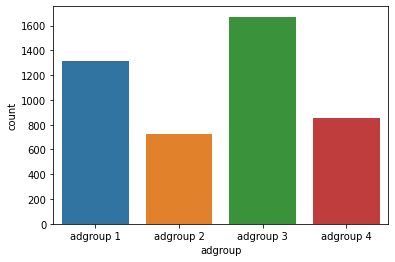

In [ ]:
sns.countplot("adgroup",data=data)

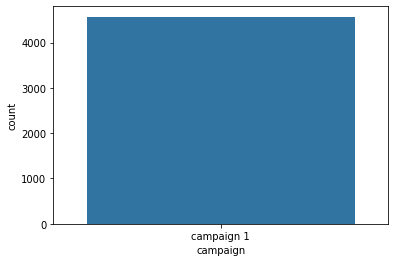

In [ ]:
sns.countplot("campaign",data=data)

Since there is only one campaign in the training data, it is meaningless to take the campaign column into consideration

In [ ]:
data["ad"].value_counts().sort_values()

ad 51      3
ad 24      4
ad 39      4
ad 47      4
ad 31      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

There are 70 types of ads in the ad column of our training data

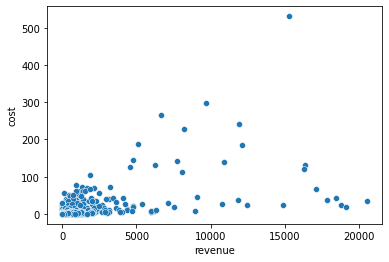

In [ ]:
sns.scatterplot(x="revenue",y="cost",data=data)

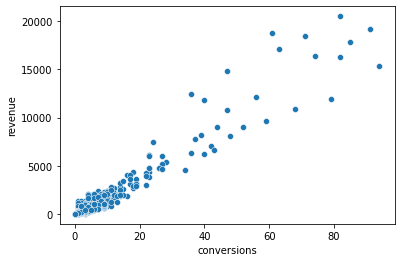

In [ ]:
sns.scatterplot(x="conversions",y="revenue",data=data)

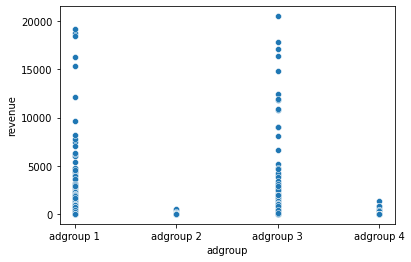

In [ ]:
sns.scatterplot(x="adgroup",y="revenue",data=data)

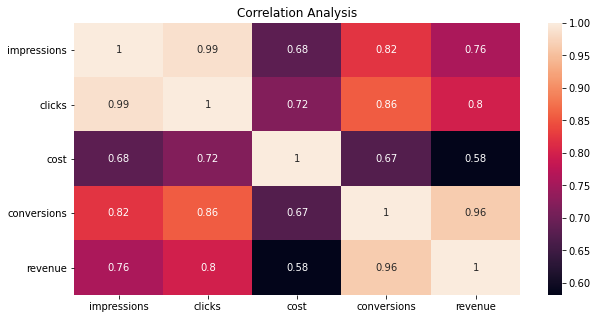

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Correlation Analysis")
sns.heatmap(data.corr(),annot=True)

Conclusions:


*   The variable "Conversion" is highly correlated to our target variable "Revenue".
*   The variable "Cost" is least correlated with our target variable "Revenue". 



In [ ]:
data.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [ ]:
data.cost.sort_values(ascending = False)

2262    531.25
2273    297.96
2264    265.44
2272    241.70
2248    228.20
         ...  
2546      0.00
2543      0.00
3905      0.00
2536      0.00
1007      0.00
Name: cost, Length: 4571, dtype: float64

In [ ]:
data.impressions.sort_values(ascending=False)

2262    3239
2253    2151
687     2101
2248    2023
701     2009
        ... 
3354       1
3982       1
411        1
2663       1
3406       1
Name: impressions, Length: 4571, dtype: int64

In [ ]:
data.clicks.sort_values(ascending=False)

2262    1771
2264    1193
2247    1177
687     1147
2272    1118
        ... 
2475       0
545        0
4132       0
4135       0
3589       0
Name: clicks, Length: 4571, dtype: int64

In [ ]:
data_train.cost[(data_train["cost"] > 300)] = 300
data_train.impressions[(data_train["impressions"] > 2200)] = 2200
data_train.clicks[(data_train["clicks"]  > 1200)] = 1200

In [ ]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


TRAINING THE MODEL

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["date","revenue","campaign","ad"],axis=1)
y = data["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train = pd.get_dummies(X_train)
X_train.head() 

,impressions,clicks,cost,conversions,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
1572,8,1,1.20,0,0,1,0,0
3164,3,0,0.00,0,0,1,0,0
3160,35,15,0.18,1,0,0,1,0
1268,70,23,1.44,0,1,0,0,0
229,69,23,0.26,0,1,0,0,0


In [ ]:
y_train.head()

1572     0.0
3164     0.0
3160    80.5
1268     0.0
229      0.0
Name: revenue, dtype: float64

In [ ]:
X_test = pd.get_dummies(X_test)
X_test.head() 

,impressions,clicks,cost,conversions,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
1552,58,26,6.86,0,1,0,0,0
23,21,8,0.09,0,1,0,0,0
252,61,32,0.35,2,1,0,0,0
2698,4,2,0.02,0,0,0,0,1
3996,98,47,2.67,0,0,0,1,0


In [ ]:
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
from IPython.display import Image
import pydotplus

In [ ]:
param_grid_decision_tree = {"max_depth":[1,2,3,4,5,6,7,8,9,10],"min_samples_split":[1,2,3,4,5],"min_samples_leaf":[1,2,3,4,5]}
grid1 = GridSearchCV(tree.DecisionTreeRegressor(),param_grid_decision_tree,verbose=3)

In [ ]:
grid1.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=1 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.146, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.681, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=3, score=0.806, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.146, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.636, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.644, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.681, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_s

[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:    9.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                   

In [ ]:
grid1.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [ ]:
grid1.best_score_

0.9205599668577318

In [ ]:
param_grid_random_forest = {"n_estimators":[100,200,300,400,500,600],"min_samples_split":[1,2,3,4,5],"min_samples_leaf":[1,2,3,4,5]}
grid2 = GridSearchCV(ensemble.RandomForestRegressor(),param_grid_random_forest,verbose=3)

In [ ]:
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=100 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=200 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=200 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=200 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=200 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=200 .......
[CV]  min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] min_samples_leaf=1, min_samples_split=1, n_estimators=300 .......
[CV]  min_samples_leaf=1, min_samp

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 15.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid2.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
grid2.best_score_

0.9250176151168905

In [ ]:
# Got the best value for the parameters by using Grid Search CV
regtree = tree.DecisionTreeRegressor(criterion = "mse", max_depth = 5, max_features = "auto", min_samples_split = 3,min_samples_leaf=2, splitter = "best", random_state = 0)

In [ ]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
predictions_decision_tree = regtree.predict(X_test)

In [ ]:
print("RMSE score for Test data using Decision Tree Regressor: ", np.sqrt(mean_squared_error(y_test, predictions_decision_tree)))

RMSE score for Test data using Decision Tree Regressor:  255.4325372430519


In [ ]:
print("R2 score for Test data using Decision Tree Regressor: ", r2_score(y_test, predictions_decision_tree))

R2 score for Test data using Decision Tree Regressor:  0.914659909858938


In [ ]:
randomforest = ensemble.RandomForestRegressor(criterion="mse",n_estimators=100,min_samples_leaf= 2, min_samples_split=5)

In [ ]:
randomforest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predictions_random_forest = randomforest.predict(X_test)

In [ ]:
print("RMSE score for Test data using Random Forest Regressor: ", np.sqrt(mean_squared_error(y_test, predictions_random_forest)))

RMSE score for Test data using Random Forest Regressor:  226.60000809794957


In [ ]:
print("R2 score for Test data using Random Forest Regressor: ", r2_score(y_test, predictions_random_forest))

R2 score for Test data using Random Forest Regressor:  0.932838481823288
